# Show how changing the mean and SD of our null normal distribution does not effect the null distribution of our t values

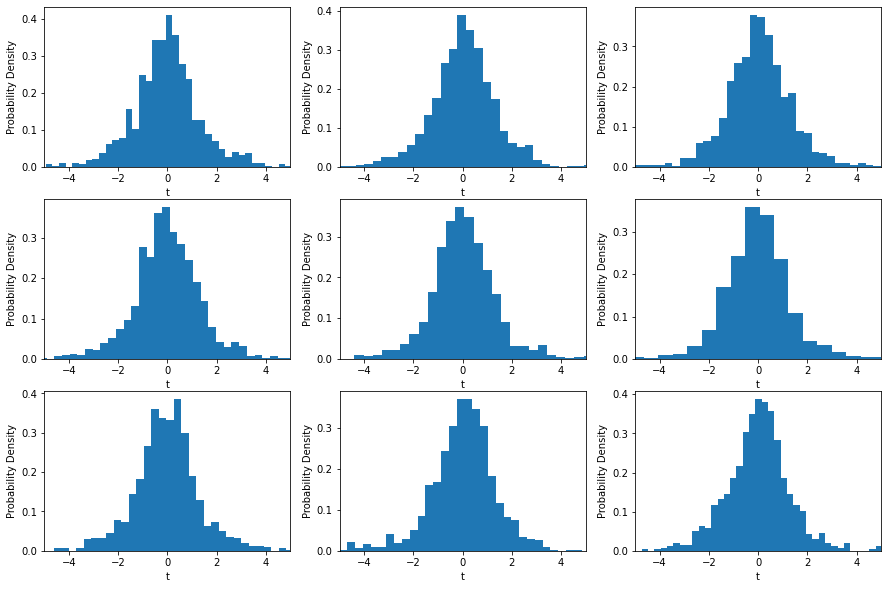

In [33]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import math
import random

# Collect values of mu and sigma to test

mu = [10,50,100];
sigma = [1, 5, 10];
i = 1;

plt.figure(figsize=(15, 10))
for m in range(0,3):
    for n in range(0,3):
        norm_data = np.random.normal(mu[m],sigma[n],50000);
#         plt.subplot(3,3,i);
#         plt.hist(norm_data,density = True,bins = 50);
#         plt.xlabel("x");
#         plt.ylabel("Count");
#         i = i+1;
        
        # Determine null t distribution
        null_t = np.zeros(1000);
        for q in np.arange(0,1000,1):
            tmp = random.sample(list(norm_data),5);
            null_t[q] = (np.mean(tmp)-mu[m])/np.std(tmp)*np.sqrt(4)
        plt.subplot(3,3,i);
        plt.hist(null_t, density = True,bins = 50);
        plt.xlabel("t");plt.xlim(-5,5);
        plt.ylabel("Probability Density");
        i = i+1;


# Show how changing the number of samples taken from our null normal distribution DOES effect the null distribution of our t values

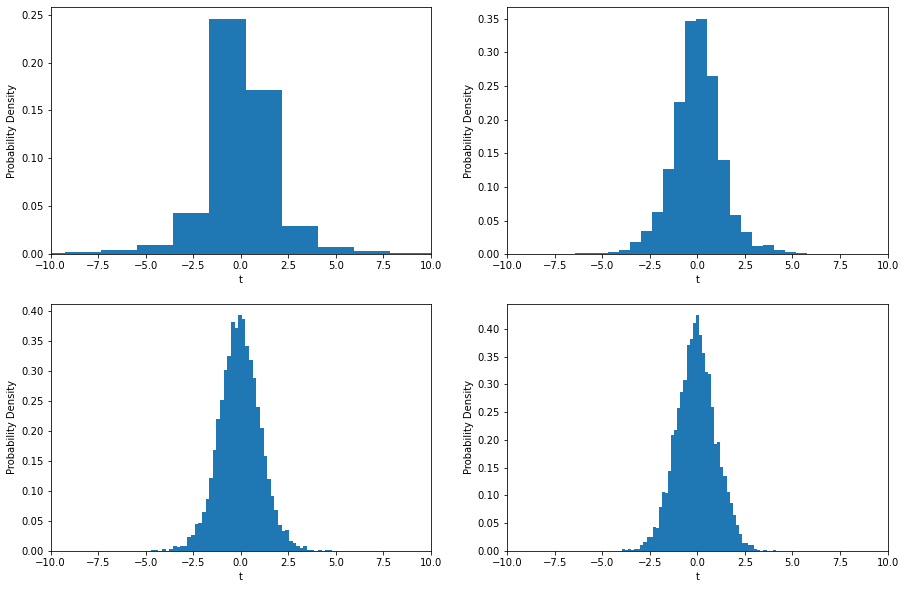

In [47]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import math
import random

# Collect values of mu and sigma to test

mu = [100];
sigma = [10];
n_samples = [3,5,15,30]
i = 1;

norm_data = np.random.normal(mu,sigma,50000);

plt.figure(figsize=(15, 10))
for m in range(0,4):
        
        # Determine null t distribution
        null_t = np.zeros(5000);
        for q in np.arange(0,5000,1):
            tmp = random.sample(list(norm_data),n_samples[m]);
            null_t[q] = (np.mean(tmp)-mu)/np.std(tmp)*np.sqrt(n_samples[m]-1)
        plt.subplot(2,2,i);
        plt.hist(null_t, density = True,bins = 50,histtype = 'bar');
        plt.xlabel("t");plt.xlim(-10,10)
        plt.ylabel("Probability Density");
        i = i+1;


# Build t distribution for two sample, equal n and variance

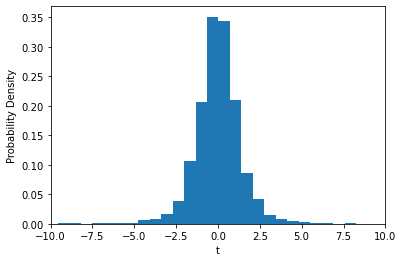

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import math
import random

# Collect values of mu and sigma to test

mu = [100];
sigma = [10];
n_samples = [3]
i = 1;

norm_data = np.random.normal(mu,sigma,50000);


m = 0;        
            # Determine null t distribution
null_t = np.zeros(5000);
for q in np.arange(0,5000,1):
    tmp1 = random.sample(list(norm_data),n_samples[m]);
    tmp2 = random.sample(list(norm_data),n_samples[m]);
    denom = np.sqrt((np.std(tmp1)**2+np.std(tmp2)**2)/2)*np.sqrt(2/(n_samples[m]-1));
    null_t[q] = (np.mean(tmp1)-np.mean(tmp2))/denom;


plt.hist(null_t, density = True,bins = 50,histtype = 'bar');
plt.xlabel("t");plt.xlim(-10,10);
plt.ylabel("Probability Density");

In [19]:
sum(null_t < -1.58)/5000

# testing 
tmp1 = [2,3,4]
tmp2 = [3,5,6]

denom = np.sqrt((np.std(tmp1)**2+np.std(tmp2)**2)/2)*np.sqrt(2/(n_samples[m]-1));
t = (np.mean(tmp1)-np.mean(tmp2))/denom
print(t) # Checked and is correct

-1.5811388300841902


# Code for T tests and Linear Regression

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import math
import random
import statsmodels.api as sm

Lakers = [200, 210, 220,225,215];
Heat = [190, 220, 193, 200, 190];

# Print out results for mulitple t tests
print(stats.ttest_1samp(Lakers,0))
print(stats.ttest_1samp(Heat,0))
print(stats.ttest_ind(Lakers,Heat))

# Show that intercept is 1 sample t test
t = np.mean(Heat)/np.std(Heat,ddof=0)*np.sqrt(5)
print(t)

# Train linear model to compare to t tests
y = np.r_[Lakers,Heat];

# Add constant. Can do by hand or use x = sm.add_constant(x)
x = [1,1,1,1,1,0,0,0,0,0]
z = x; # no intercept
x = np.c_[np.ones(10),x]

model = sm.OLS(y,x).fit()
model.summary()



Ttest_1sampResult(statistic=49.75398938235465, pvalue=9.764970120832926e-07)
Ttest_1sampResult(statistic=35.12981468567422, pvalue=3.918369424831296e-06)
Ttest_indResult(statistic=2.167939197635687, pvalue=0.06201738353641719)
39.276326837068986


C:\Users\JAS518\Anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.370
Model:                            OLS   Adj. R-squared:                  0.291
Method:                 Least Squares   F-statistic:                     4.700
Date:                Thu, 18 Nov 2021   Prob (F-statistic):             0.0620
Time:                        13:39:50   Log-Likelihood:                -37.261
No. Observations:                  10   AIC:                             78.52
Df Residuals:                       8   BIC:                             79.13
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        198.6000      5.023     39.539      0.000     187.017     210.183
x1            15.4000      7.104      2.168      0.062      -0.981      31.781
==============================================================================
Omnibus:                        1.804   Durbin-Watson:                   2.175
Prob(Omnibus):                  0.406   Jarque-Bera (JB):                0.851
Skew:                           0.700   Prob(JB):                        0.654
Kurtosis:                       2.713   Cond. No.                         2.62
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""